In [1]:
import IPython
import os
os.system("ls [a-z]*.md | sed 's/\.md$//'| sort -u >ids.txt")
with open('ids.txt') as f:
    files = [ x.strip('\n') for x in f.readlines() ]
print (files)

# Create labels for the graph
flab = files

['adhakane', 'aliu11', 'anau', 'apatel79', 'apoole13', 'atipton7', 'atutko', 'bwhite39', 'byen', 'cbrunet1', 'clemon3', 'cmelton3', 'cmetzner', 'cscott57', 'cwilder8', 'ddasilva', 'dlee97', 'drainbo1', 'dsande30', 'dsuarez1', 'egrisso1', 'ehicks8', 'fcj789', 'jball16', 'jdunkley', 'jlambers', 'jlavall1', 'jmcmicha', 'jsamar1', 'kdeange1', 'madams56', 'mbutera', 'mnb512', 'mshoffn2', 'nbranch', 'nvannost', 'nwest13', 'rbrink1', 'rmc562', 'roffutt', 'rweeks2', 'slalani', 'smaniko1', 'smanikon', 'smunira', 'sruoti', 'stoll', 'tbeck4', 'tkeyes1', 'tkrobats', 'tnguye59', 'twelles', 'twheaton', 'twinter4', 'vzenkov', 'yma29', 'ysun60', 'zcole5', 'zlu21', 'zyang37']


In [2]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
documents = []

text = ""
for f in files:
  a = open (f+".md")
  line = a.read()
  documents .append(line)
  text = text + " " + line
      
#Do tf.idf magic 
tfidf = TfidfVectorizer().fit_transform(documents)
# no need to normalize, since Vectorizer will return normalized tf-idf
# we may want to see these, e.g., analyze in R
pd .DataFrame.from_records(tfidf.A).to_csv('tfidf.csv')

In [3]:
# Lets see the similarity matrix
# first create labels
idx = {}
for i in range(len(files)):
    idx[i] = files [i]

# Multiply the tfidf matrix to get all pairwise distances    
df = pd. DataFrame.from_records((tfidf * tfidf.T).A,columns=files)

#do pretty printing
pd.options.display.float_format = '{:20,.3f}'.format
df = df.rename(index=idx)
#Output to a file in case we want to look at it separately
df.to_csv("dist.csv")
df

,adhakane,aliu11,anau,apatel79,apoole13,atipton7,atutko,bwhite39,byen,cbrunet1,...,tnguye59,twelles,twheaton,twinter4,vzenkov,yma29,ysun60,zcole5,zlu21,zyang37
adhakane,1.000,0.072,0.121,0.048,0.069,0.022,0.083,0.077,0.069,0.104,...,0.033,0.054,0.135,0.041,0.149,0.106,0.098,0.065,0.043,0.092
aliu11,0.072,1.000,0.041,0.092,0.118,0.229,0.084,0.128,0.037,0.105,...,0.079,0.125,0.056,0.053,0.091,0.222,0.059,0.023,0.039,0.122
anau,0.121,0.041,1.000,0.093,0.146,0.194,0.281,0.123,0.168,0.092,...,0.130,0.139,0.211,0.124,0.136,0.082,0.181,0.214,0.071,0.098
apatel79,0.048,0.092,0.093,1.000,0.119,0.039,0.130,0.062,0.078,0.083,...,0.105,0.059,0.080,0.062,0.046,0.021,0.065,0.078,0.015,0.067
apoole13,0.069,0.118,0.146,0.119,1.000,0.055,0.179,0.084,0.160,0.080,...,0.058,0.123,0.144,0.173,0.095,0.052,0.086,0.106,0.046,0.103
atipton7,0.022,0.229,0.194,0.039,0.055,1.000,0.151,0.095,0.059,0.078,...,0.033,0.122,0.046,0.138,0.110,0.186,0.104,0.058,0.050,0.095
atutko,0.083,0.084,0.281,0.130,0.179,0.151,1.000,0.066,0.146,0.118,...,0.118,0.135,0.209,0.094,0.142,0.062,0.244,0.177,0.053,0.139
bwhite39,0.077,0.128,0.123,0.062,0.084,0.095,0.066,1.000,0.074,0.047,...,0.069,0.065,0.214,0.074,0.092,0.178,0.091,0.084,0.033,0.159
byen,0.069,0.037,0.168,0.078,0.160,0.059,0.146,0.074,1.000,0.088,...,0.057,0.102,0.149,0.154,0.082,0.053,0.126,0.140,0.042,0.111
cbrunet1,0.104,0.105,0.092,0.083,0.080,0.078,0.118,0.047,0.088,1.000,...,0.039,0.164,0.062,0.135,0.083,0.057,0.088,0.163,0.059,0.069


In [4]:
import networkx as nx
import json

# use these distances to create a graph by cutting links below .21 
nxg = nx.Graph()
for i in range(len(files)-1):
    nLinks = 0
    maxVal = 0
    jMax = 0
    for j in range(i+1,len(files)):
        if df.iloc[i,j] > maxVal: 
            maxVal = df.iloc[i,j]
            jMax = j
        if (df.iloc[i,j] > .37):
            nLinks += 1
            nxg.add_edge(flab[i], flab[j], weight=df.iloc[i,j],color='r')
    if nLinks == 0:
        nxg.add_edge(flab[i], flab[jMax], weight=df.iloc[i,jMax],color='r')
        
print (nxg.nodes())

['aliu11', 'mnb512', 'atipton7', 'nbranch', 'zyang37', 'ysun60', 'jsamar1', 'mbutera', 'jlavall1', 'roffutt', 'apoole13', 'bwhite39', 'anau', 'cmelton3', 'byen', 'tnguye59', 'dsuarez1', 'twheaton', 'ddasilva', 'nwest13', 'jlambers', 'slalani', 'adhakane', 'smaniko1', 'egrisso1', 'yma29', 'twinter4', 'cscott57', 'rmc562', 'tkeyes1', 'dlee97', 'zlu21', 'rbrink1', 'cwilder8', 'jmcmicha', 'jdunkley', 'vzenkov', 'cbrunet1', 'rweeks2', 'kdeange1', 'twelles', 'madams56', 'tkrobats', 'sruoti', 'nvannost', 'cmetzner', 'apatel79', 'smanikon', 'atutko', 'stoll', 'jball16', 'smunira', 'tbeck4', 'fcj789', 'zcole5', 'drainbo1', 'mshoffn2', 'clemon3', 'ehicks8', 'dsande30']


tkeyes1 byen stoll smunira jsamar1 mbutera 
smanikon clemon3 rmc562 cbrunet1 ddasilva slalani 
mnb512 rweeks2 madams56 twinter4 kdeange1 twheaton 
smaniko1 egrisso1 rbrink1 jlavall1 adhakane tkrobats 
atipton7 tbeck4 twelles cscott57 vzenkov jmcmicha 
zlu21 zyang37 nbranch jball16 nvannost jdunkley 
dlee97 fcj789 apoole13 sruoti aliu11 nwest13 
ehicks8 dsuarez1 apatel79 yma29 bwhite39 mshoffn2 
cwilder8 roffutt dsande30 zcole5 cmetzner cmelton3 
jlambers drainbo1 atutko anau ysun60 tnguye59 


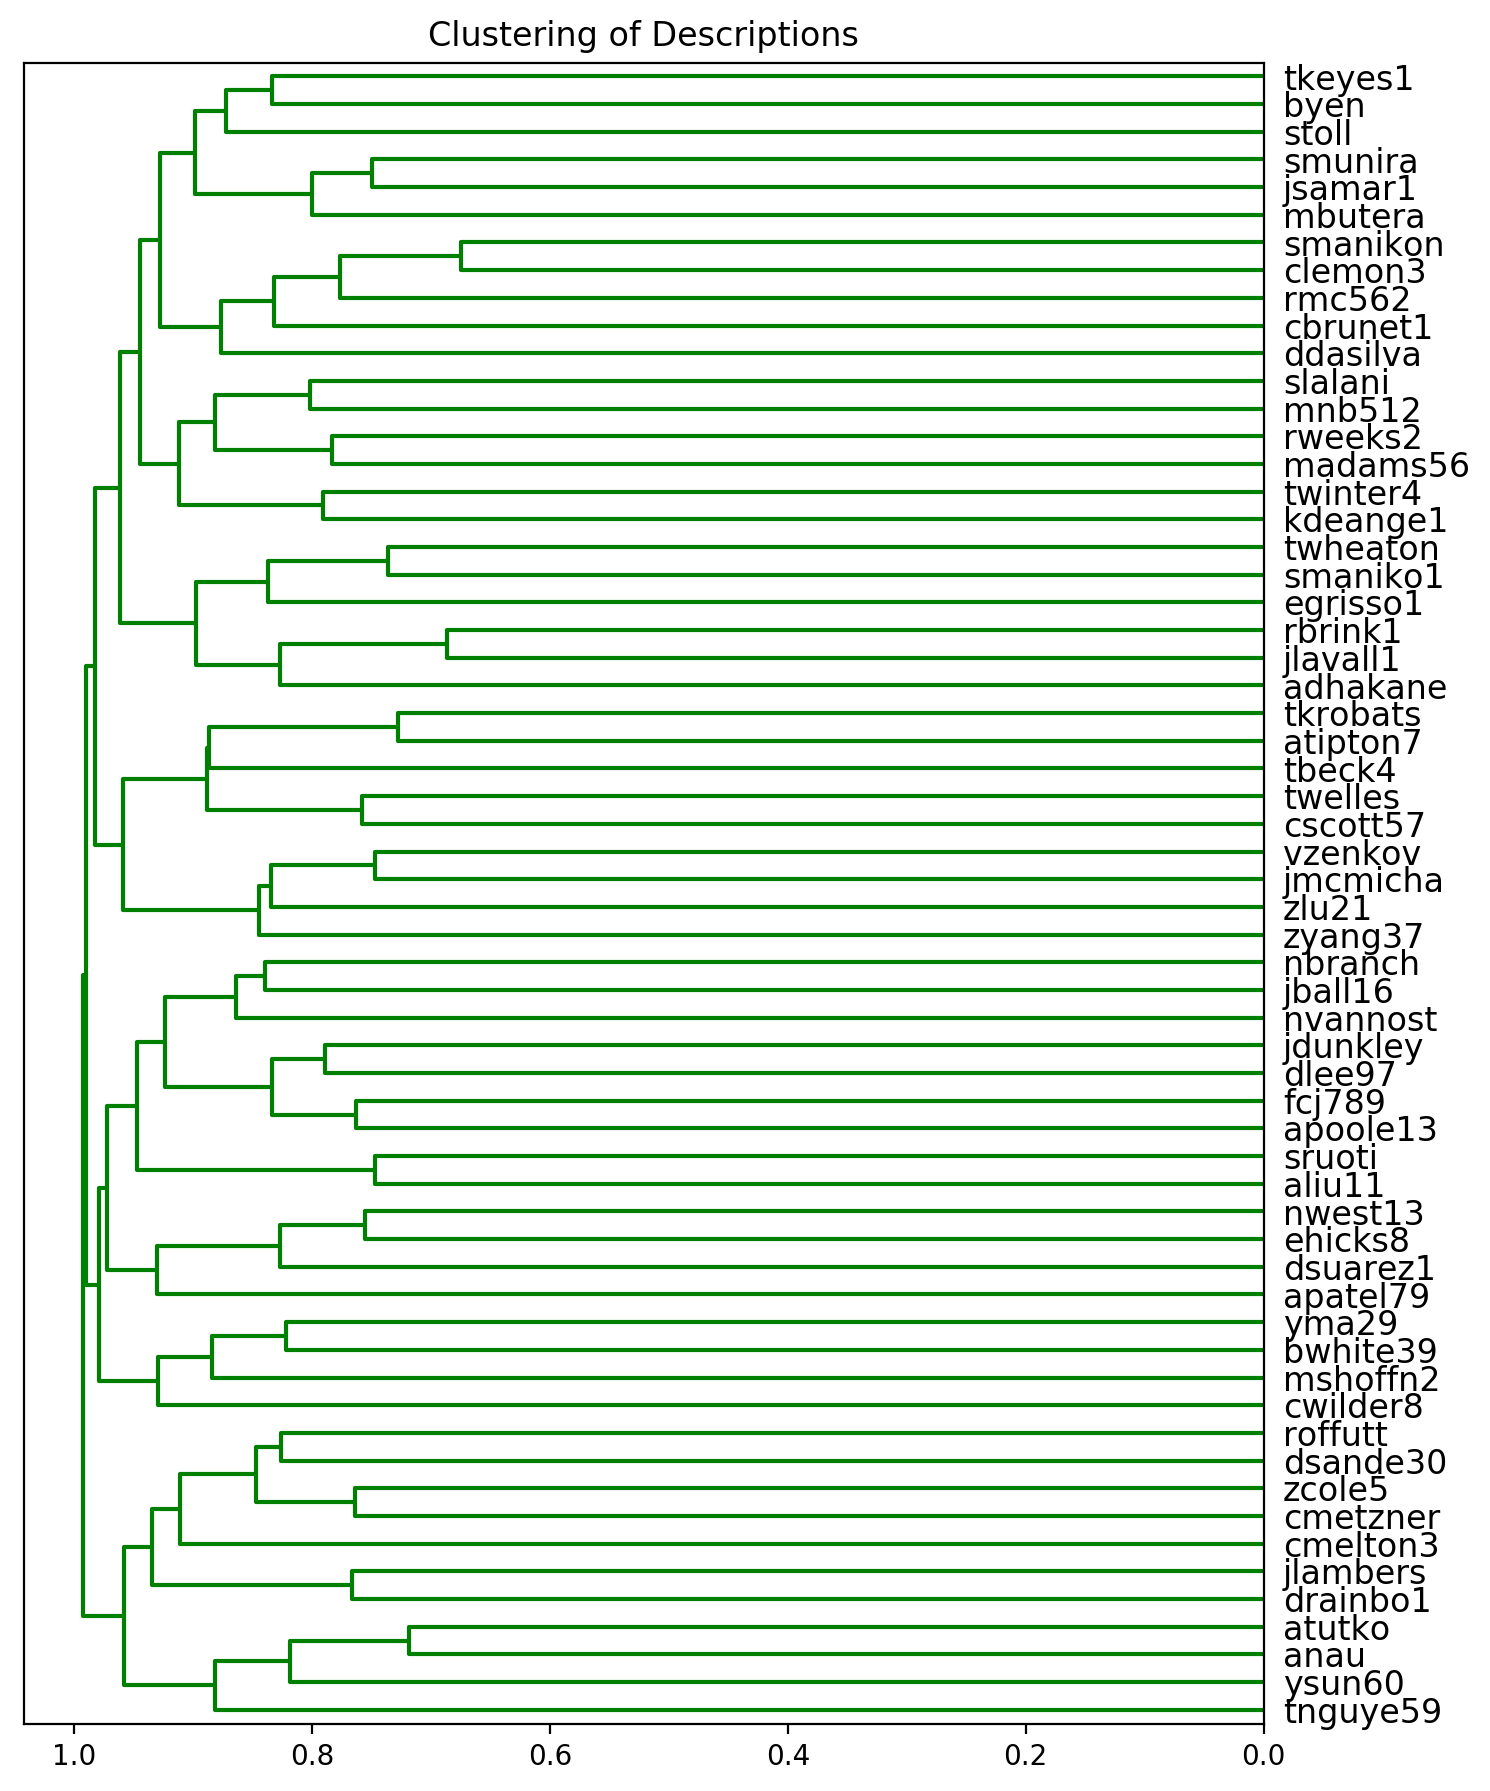

In [37]:
from scipy.cluster.hierarchy import linkage, ward, dendrogram
from scipy.spatial.distance import pdist
import math, sys
import matplotlib.pyplot as plt
import numpy as np
import re

%matplotlib inline

# Calculate cosine distance (clustering needs distance, not similarity)   
#dist ij = dist2 [i*(n-1)+j] and i < j
dist1 = pdist(tfidf.A, 'cosine')
minVal = min(dist1)
ij = np.where(dist1==minVal)[0][0]
for i in range(0,59):
    for j in range (i+1,59):
        ij -= 1
        if ij == 0: 
            break
    else:        
        continue  
    break



# Do clustering
linkage_matrix = linkage (dist1, method='complete')
#print(linkage_matrix)

# Plot results
fig = plt.figure(1, figsize=(8, 11),dpi=200)
plt.clf()
ddata = dendrogram(linkage_matrix,
               color_threshold=1,
               p=97,
               labels=flab,
               truncate_mode='none',
               orientation='left',
                show_leaf_counts=True,leaf_font_size =12
               )
for j in range (10):
  for i in range (6):
     sys.stdout.write(flab[ddata['leaves'][59-j*6-i]]+' ')
  sys.stdout.write('\n')
        
plt.title("Clustering of Descriptions")
fig.savefig("teaming.png")


In [10]:
from networkx.readwrite import json_graph
nld = json_graph.node_link_data(nxg)
json.dump(nld, open('students.json','w'))

In [11]:

from IPython.display import IFrame
from IPython.core.display import display
# IPython Notebook can serve files and display them into
# inline frames. Prepend the path with the 'files' prefix.
viz_file = 'files/students.html'
display(IFrame(viz_file, '100%', '400px'))